<a href="https://colab.research.google.com/github/schenita/info5731/blob/master/floyd_selfstudy5_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data Science from Scratch-Grus - Chapter 20 Natural Langauge Processing in Python 2
# Word Clouds - visualizing words and counts is word clouds

In [0]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
             ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
             ("data science", 60, 70), ("analytics", 90, 3),
             ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
             ("actionable insights", 40, 30), ("think out of the box", 45, 10),
             ("self-starter", 30, 50), ("customer focus", 65, 15),
             ("thought leadership", 35, 35)]

In [3]:
print data

[('big data', 100, 15), ('Hadoop', 95, 25), ('Python', 75, 50), ('R', 50, 40), ('machine learning', 80, 20), ('statistics', 20, 60), ('data science', 60, 70), ('analytics', 90, 3), ('team player', 85, 85), ('dynamic', 2, 90), ('synergies', 70, 0), ('actionable insights', 40, 30), ('think out of the box', 45, 10), ('self-starter', 30, 50), ('customer focus', 65, 15), ('thought leadership', 35, 35)]


In [0]:
import matplotlib.pyplot as plt #Important step missing from book

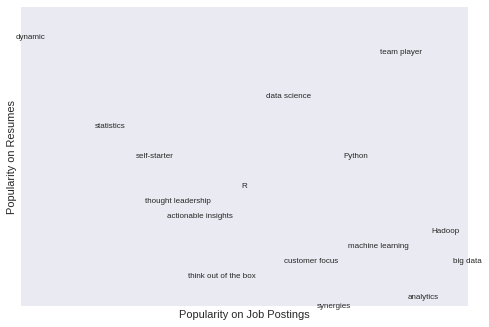

In [14]:
def text_size(total):
   return 8 + total / 200 * 20

for word, job_popularity, resume_popularity in data:
  plt.text(job_popularity, resume_popularity, word,
                 ha='center', va='center',
                 size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
# n-gram Models
# Pull code from Ch 9

In [0]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text 
soup = BeautifulSoup(html, 'html5lib')


In [0]:
def fix_unicode(text):
  return text.replace(u"\u2019", "'")

In [0]:
def get_document():   # replace the first two commands  to make this work
  url = "http://radar.oreilly.com/2010/06/what-is-data-science.html" 
  html = requests.get(url).text
  soup = BeautifulSoup(html, 'html5lib')

  content = soup.find("div", "entry-content")
  regex = r"[\w']+|[\.]"

  document = []

  for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text)) 
    document.extend(words)
  
  return document

In [0]:
# Bigrams

In [0]:
def generateTransitions(document):
    bigrams = zip(document, document[1:])
    transitions = defaultdict(list)
    for prev, current in bigrams:
        transitions[prev].append(current)

    return transitions

In [0]:
def generate_using_bigrams(transitions):
    current = "."   # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." we're done

In [0]:
# Trigram Model

In [0]:
def generateTrigramTransitions(document):
    trigrams = zip(document, document[1:], document[2:])
    trigram_transitions = defaultdict(list)
    starts = []

    for prev, current, next in trigrams:
        if prev == ".":              # if the previous "word" was a period
            starts.append(current)   # then this is a start word

        trigram_transitions[(prev, current)].append(next)

    return starts, trigram_transitions


In [0]:
def generate_using_trigrams(starts, trigram_transitions):
    current = random.choice(starts)   # choose a random starting word
    prev = "."                        # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next = random.choice(next_word_candidates)

        prev, current = current, next
        result.append(current)

        if current == ".":
            return " ".join(result)

In [0]:
# Grammars

In [0]:
def generate_sentence(grammar):
    return expand(grammar, ["_S"])

def is_terminal(token):
    return token[0] != "_"

def expand(grammar, tokens):
    for i, token in enumerate(tokens):

        if is_terminal(token): continue

        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        return expand(grammar, tokens)

    return tokens

In [0]:
grammar = {
        "_S"  : ["_NP _VP"],
        "_NP" : ["_N",
                 "_A _NP _P _A _N"],
        "_VP" : ["_V",
                 "_V _NP"],
        "_N"  : ["data science", "Python", "regression"],
        "_A"  : ["big", "linear", "logistic"],
        "_P"  : ["about", "near"],
        "_V"  : ["learns", "trains", "tests", "is"]
}


In [0]:
def is_terminal(token): 
  return token[0] != "_"

In [0]:
def expand(grammar, tokens):
  for i, token in enumerate(tokens):
    
            # skip over terminals
            if is_terminal(token): continue
          
            # if we get here, we found a non-terminal token 
            # so we need to choose a replacement at random 
            replacement = random.choice(grammar[token])
            
            if is_terminal(replacement): 
              tokens[i] = replacement
            else:
              tokens = tokens[:i] + replacement.split() + tokens[(i+1):] # now call expand on the new list of tokens
            return expand(grammar, tokens)
           # if we get here we had all terminals and are done
            return tokens

In [0]:
def generate_sentence(grammar): 
  return expand(grammar, ["_S"])

In [0]:
# An Aside: Gibbs Sampling

In [46]:
import random
random.random()

0.87796298105635

In [49]:
from scipy.stats import norm
norm.ppf(random.random())

0.6766634236120365

In [0]:
def roll_a_die():
  return random.choice([1,2,3,4,5,6])

def direct_sample(): 
  d1 = roll_a_die() 
  d2 = roll_a_die() 
  return d1, d1 + d2


In [0]:
def random_y_given_x(x):
  """equally likely to be x + 1, x + 2, ... , x + 6""" 
  return x + roll_a_die()

In [0]:
def random_x_given_y(y): 
  if y <= 7:
    # if the total is 7 or less, the first die is equally likely to be 
    # 1, 2, ..., (total - 1)
    return random.randrange(1, y)
  else:
    # if the total is 7 or more, the first die is equally likely to be 
    # (total - 6), (total - 5), ..., 6
    return random.randrange(y - 6, 7)


In [0]:
def gibbs_sample(num_iters=100):
    x, y = 1, 2 # doesn't really matter 
    for _ in range(num_iters):
      x = random_x_given_y(y)
      y = random_y_given_x(x) 
    return x, y


In [0]:
def compare_distributions(num_samples=1000): 
  counts = defaultdict(lambda: [0, 0]) 
  for _ in range(num_samples):
    counts[gibbs_sample()][0] += 1
    counts[direct_sample()][1] += 1 
  return counts


In [0]:
#Topic Modeling

In [0]:
def sample_from(weights):
  """returns i with probability weights[i] / sum(weights)""" 
  total = sum(weights)
  rnd = total * random.random()
  for i, w in enumerate(weights):
      rnd-=w
      if rnd <= 0: return i

In [0]:
documents = [
        ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
        ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
        ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
        ["R", "Python", "statistics", "regression", "probability"],
        ["machine learning", "regression", "decision trees", "libsvm"],
        ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
        ["statistics", "probability", "mathematics", "theory"],
        ["machine learning", "scikit-learn", "Mahout", "neural networks"],
        ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
        ["Hadoop", "Java", "MapReduce", "Big Data"],
        ["statistics", "R", "statsmodels"],
        ["C++", "deep learning", "artificial intelligence", "probability"],
        ["pandas", "R", "Python"],
        ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
        ["libsvm", "regression", "support vector machines"]
]

In [0]:
# a list of Counters, one for each document
K = 4
import collections # must import collections for counter to work

In [0]:
document_topic_counts = [collections.Counter() for _ in documents]

In [0]:
# a list of Counters, one for each topic
topic_word_counts = [collections.Counter() for _ in range(K)]

In [0]:
  # a list of numbers, one for each topic
topic_counts = [0 for _ in range(K)]


In [68]:
print topic_counts

[0, 0, 0, 0]


In [0]:
# a list of numbers, one for each document
document_lengths = map(len, documents)

In [0]:
distinct_words = set(word for document in documents for word in document) 
W = len(distinct_words)

In [0]:
D = len(documents)

In [73]:
document_topic_counts[3][1]


0

In [74]:
topic_word_counts[2]["nlp"]


0

In [0]:
def p_topic_given_document(topic, d, alpha=0.1):
  """the fraction of words in document _d_
  that are assigned to _topic_ (plus some smoothing)"""
  return ((document_topic_counts[d][topic] + alpha) / 
          (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1): 
  """the fraction of words assigned to _topic_ 
  that equal _word_ (plus some smoothing)"""
  return ((topic_word_counts[topic][word] + beta) / 
          (topic_counts[topic] + W * beta))


In [0]:
def topic_weight(d, word, k):
  """given a document and a word in that document, 
  return the weight for the kth topic"""
  return p_word_given_topic(word, k) * p_topic_given_document(k, d)

In [0]:
def choose_new_topic(d, word):
  return sample_from([topic_weight(d, word, k)
                      for k in range(K)])

In [0]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
  for word, topic in zip(documents[d], document_topics[d]):
            document_topic_counts[d][topic] += 1
            topic_word_counts[topic][word] += 1
            topic_counts[topic] += 1

In [0]:
for iter in range(1000): 
  for d in range(D):
    for i, (word, topic) in enumerate(zip(documents[d], 
                                          document_topics[d])):
        # remove this word / topic from the counts 
        # so that it doesn't influence the weights 
        document_topic_counts[d][topic] -= 1 
        topic_word_counts[topic][word] -= 1 
        topic_counts[topic] -= 1 
        document_lengths[d] -= 1
        
        # choose a new topic based on the weights
        new_topic = choose_new_topic(d, word)
        document_topics[d][i] = new_topic
                
        # and now add it back to the counts
        document_topic_counts[d][new_topic] += 1
        topic_word_counts[new_topic][word] += 1
        topic_counts[new_topic] += 1
        document_lengths[d] += 1

In [82]:
for k, word_counts in enumerate(topic_word_counts):
  for word, count in word_counts.most_common():
    if count > 0: print k, word, count

0 Java 3
0 Big Data 3
0 Hadoop 2
0 deep learning 2
0 artificial intelligence 2
0 C++ 2
0 neural networks 1
0 Storm 1
0 programming languages 1
0 MapReduce 1
0 Haskell 1
1 R 4
1 statistics 3
1 Python 3
1 probability 2
1 pandas 2
1 statsmodels 2
1 mathematics 1
1 numpy 1
1 theory 1
1 scipy 1
2 HBase 3
2 Postgres 2
2 MongoDB 2
2 Cassandra 2
2 NoSQL 1
2 MySQL 1
2 Spark 1
3 regression 3
3 libsvm 2
3 scikit-learn 2
3 machine learning 2
3 neural networks 1
3 probability 1
3 Mahout 1
3 Python 1
3 decision trees 1
3 databases 1
3 support vector machines 1


In [0]:
  topic_names = ["Big Data and programming languages",
                   "Python and statistics",
                   "databases",
                   "machine learning"]

In [84]:
for document, topic_counts in zip(documents, document_topic_counts): 
  print document
  for topic, count in topic_counts.most_common():
    if count > 0:
        print topic_names[topic], count, 
  print


['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programming languages 4 databases 3
['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 5
['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 5 machine learning 1
['R', 'Python', 'statistics', 'regression', 'probability']
Python and statistics 4 machine learning 1
['machine learning', 'regression', 'decision trees', 'libsvm']
machine learning 4
['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
Big Data and programming languages 4 Python and statistics 1 machine learning 1
['statistics', 'probability', 'mathematics', 'theory']
Python and statistics 4
['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
machine learning 4
['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
Big Data and programming languages 4
['Hadoop', 'Java', 'MapReduce', 'Big Data']
Big Data and programming languages 4
['statistic